## All Necessary imports

In [76]:
! pip install fasttext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import fasttext
import nltk
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from imblearn.over_sampling import SMOTE 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
from imblearn.under_sampling import RandomUnderSampler


from nltk.stem import PorterStemmer, WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import TruncatedSVD

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords 
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score,accuracy_score
import pickle 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
nltk.download('wordnet')
from sklearn.metrics import classification_report

from sklearn.multiclass import OneVsRestClassifier



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


DATA PREPROCESSING/ CLEANING 

# CLASSIFIER 
## RANDOM FOREST

In [100]:
def train_rf(X_train, y_train, X_test, y_test):  
    print("----------RANDOM FOREST-----------")
    clf = RandomForestClassifier(random_state=5)
    parameters = {'n_estimators': [10,20,30,40,50,60,70,80,90,100], 'max_depth': [4,5,6,7,8], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

    cv_combined = GridSearchCV(estimator=clf, param_grid=parameters, cv=5)
    orc_clf = OneVsRestClassifier(estimator=cv_combined).fit(X_train, y_train)
    orc_clf.fit(X_train, y_train)

    y_pred = orc_clf.predict(X_test)
    print(f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))
    print(classification_report(y_train, orc_clf.predict(X_train)))
    filename = 'finalized_model_RF.sav'
    pickle.dump(orc_clf, open(filename, 'wb'))
    plot_confusion_matrix(orc_clf, X_test, y_test)
    return {
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "test_score" : accuracy_score(y_test, y_pred),
        "model" : orc_clf
    }
    

# CLASSIFIER

## Decision Tree

In [99]:
def train_dt(X_train, y_train, X_test, y_test):
  
    print("----------DECISION TREE-----------")
    clf = DecisionTreeClassifier(random_state=5)

    parameters = {'max_depth': [4,5,6,7,8], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 
                     'min_samples_split': [2,6,10,14,18,22]}

    cv_combined = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, refit=True)
    orc_clf = OneVsRestClassifier(estimator=cv_combined).fit(X_train, y_train)
    orc_clf.fit(X_train, y_train)

    pred_combined = orc_clf.predict(X_test)
    y_pred = orc_clf.predict(X_test)
    print(f1_score(y_test, y_pred, average='weighted'))
    filename = 'finalized_model_DT.sav'
    pickle.dump(orc_clf, open(filename, 'wb'))
    print(classification_report(y_test, y_pred))
    print(classification_report(y_train, orc_clf.predict(X_train)))
    plot_confusion_matrix(orc_clf, X_test, y_test)
    return {
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "test_score" : accuracy_score(y_test, y_pred),
        "model" : orc_clf
    }
    

# CLassifier
## XGBoost

In [104]:

def train_xgb(X_train, y_train, X_test, y_test):
  
    print("-----------------XGBOOST---------------------")
    clf = XGBClassifier(random_state=5)
    parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_features': ['sqrt', 'log2'],
        'criterion': ['gini', 'entropy'],
        'max_depth': [4,5,6,7,8]
        }
        
    cv_combined = RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=5, refit=True)
    orc_clf = OneVsRestClassifier(estimator=cv_combined).fit(X_train, y_train)
    orc_clf.fit(X_train, y_train)

    pred_combined = orc_clf.predict(X_test)
    y_pred = orc_clf.predict(X_test)
    print(f1_score(y_test, y_pred, average='weighted'))
    filename = 'finalized_model_XGB.sav'
    pickle.dump(orc_clf, open(filename, 'wb'))
    print(classification_report(y_test, y_pred))
    print(classification_report(y_train, orc_clf.predict(X_train)))
    plot_confusion_matrix(orc_clf, X_test, y_test)
    return {
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "test_score" : accuracy_score(y_test, y_pred),
        "model" : orc_clf
    }
    

## RESULT FORMAT 

In [ ]:
def create_log_dict(suffix, classifier, result, columns_to_drop):
    row = {"abg": suffix,
           "classifier": classifier,
           "params": result["params"],
           "f1_score": result["f1_score"],
           "train_score": result["train_score"],
           "test_score": result["test_score"],
           "dropped": columns_to_drop[1:]
          }
    return row

## Function For Handling Categorical Variables 

In [118]:
#for handlling categorical variables for valid_df & train_df
def handle_cat_var(df,label_encoder,dataset=None):
  if dataset == "train":
    print("------- For Training Set Label Encoding -------------- ")
    df["JobType"] = label_encoder.fit_transform(df['JobType'])
    print(np.unique(df["JobType"]))

  if dataset == "valid":
    print("------- For Validation Set Label Encoding -------------- ")
    df["JobType"] = label_encoder.transform(df['JobType'])
  return df["JobType"]   

## Function for Vectorization

In [94]:
#for vectorization of  valid_df & train_df
def tfidf_vectorizer(df,vectorizer,dataset=None):
  if dataset == "train":
    print("------- For Training Set Vectorizer-------------- ")
    X = vectorizer.fit_transform(df['Job_Description'])
    X= X.toarray()
    filename = 'vectorizer.sav'
    pickle.dump(vectorizer, open(filename, 'wb'))
  if dataset == "valid":
    print("------- For Validation Set Vectorizer -------------- ")
    X = vectorizer.transform(df['Job_Description'])
    X= X.toarray()
  return X 

 ## Function for Different Models

In [119]:
def call_model_instance():
  svd = TruncatedSVD(n_components=5, random_state=42)
  vectorizer = TfidfVectorizer(stop_words = 'english')
  label_encoder = LabelEncoder()
  sm = SMOTE(random_state=2)
  return svd,vectorizer,label_encoder,sm



In [106]:
def reduce_feature_size(df,svd,dataset=None):
  if dataset == "train":
    print("------- For Training Set Feature Reduction -------------- ")
    data = svd.fit_transform(df)
    filename = 'svd.sav'
    pickle.dump(svd, open(filename, 'wb'))
  if dataset == "valid":
    print("------- For Validation Set Feature Reduction  -------------- ")
    data = svd.transform(df) 
  return data 

## Preprocessing Module

In [32]:
def preprocessing(df):

    """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps.

    Input : Raw unpreprocessed text 

    Output : Processed text removed html url stopwords blankspaces

    """

    import string, re

    # remove html 

    text = re.sub(r"http\S+", "", df)
    text = re.sub(r"Http\S+", "", text)

    #  lemmatization for the messages 

    text = nltk.word_tokenize(text)
    # text = [lemmatizer.lemmatize(text) for text in text if not text in stopwords.words('english')]
    #msgs = [stemmer.stem(msg) for msg in msgs if not msg in stopwords.words('english')]
    text = " ".join(text)

    # lowercasing of strings 
    text = text.lower()

    # removing the articles in the text
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    text = re.sub(regex, " ", text)

    
    # removing the punctuation 
    exclude = set(string.punctuation)
    text = "".join(ch for ch in text if ch not in exclude)
    
    # removing the white spaces 
    text = " ".join(text.split())

    # stop_words = set(stopwords.words('english'))
  
    # word_tokens = word_tokenize(text)
      
    # filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
      
    # filtered_sentence = []
      
    # for w in word_tokens:
    #     if w not in stop_words:
    #         filtered_sentence.append(w)

    return text

# TRAIN MODELS

## Function to handle the data

- Loads Data 
- Selects only the necessary columns or fields
- Handles Categorical Variables
- Feature Extraction for both datasets
- Splits dataset into train test data 

In [120]:
# load training dataset
# load validation dataset

filepath_for_trainset = "/content/concatenated_data.csv"


def data_handling(filepath_for_trainset):

  ''' 
  Input : filepath_for_trainset & filepath_for_validset,
  Output : x_train, x_test, y_train, y_test, 
  Description: Takes in path for train and validation set provides data labelling
  vectorizes the data  and splits the set into train test and validation set

  '''

  train_df = pd.read_csv(filepath_for_trainset)
  train_df = train_df[['JobType','Job_Description']]
  train_df.dropna(subset = ['Job_Description'],inplace=True)
  train_df.drop(index=[3],inplace=True)
  train_df_counts = (train_df.JobType.value_counts())
  print(train_df)
  train_df.to_csv("With labels.csv")
  print(train_df_counts)

  svd,vectorizer,label_encoder,sm = call_model_instance()
  # labeling the two domains for train_df and validation_df 
  train_df_labels = handle_cat_var(train_df,label_encoder,dataset="train")
  print(train_df_labels)

  # print(train_df_labels)
  # print(train_df[train_df[train_df_labels.Job_Type == "5"]])
  # vectorization of the two domains for train_df and validation_df 
  X_for_train_df = tfidf_vectorizer(train_df,vectorizer,dataset="train")
  
  # splitting dataset into train test and split data
  x_train, x_test, y_train, y_test = train_test_split(X_for_train_df, train_df_labels, test_size=0.2, random_state=434)

  
  x_train = reduce_feature_size(x_train,svd,dataset="train")
  print('After Reducing, the feature size of train_X: {}'.format(x_train.shape))
  x_test = reduce_feature_size(x_test,svd,dataset="valid")
  print('After Reducing, the feature size of test_X: {}'.format(x_test.shape))


  data_handler= {"train_df":train_df , "x_train" : x_train, "x_test" : x_test, "y_train" : y_train, "y_test" : y_test}

  return data_handler
# run the datahandling function 
data_handler = data_handling(filepath_for_trainset)

        JobType                                    Job_Description
0        Retail  rapidly growing national printing mailing comp...
1        Retail  looking for experienced hvac installer for tem...
2        Retail  modelservers we re currently looking to hire f...
4     Jobs – IT  cdl class full time local regional driver need...
5     Jobs – IT  necesito personal de limpieza con o sin experi...
...         ...                                                ...
1535    Banking  topranked proprietary trading firm maverick tr...
1536    Banking  electronics company in carrollton is looking f...
1537    Banking  red ’ s electric is looking to hire talented a...
1538    Banking  cpa firm is hiring for accounting and tax prof...
1540    Banking  now hiring in temple tx please give us call to...

[1507 rows x 2 columns]
Sell-House        606
Retail            485
Banking           190
Rent-Apartment    135
Jobs – IT          89
Name: JobType, dtype: int64
------- For Training Set Label En

In [108]:
dataframe = pd.read_csv("/content/concatenated_data.csv")

In [111]:
dataframe.Job_Description[2]

'modelservers we re currently looking to hire fun energized and dedicated modelservers to join our team make avg of 300 to 500 per shift in cash if your interested in working with us and believe that you d be strong asset to our club we ll train you to have knowledge of beverages and food service will be expected to serve guests in timely manner with great attitude if your wanting job that leads to better job like bartender or door hostess please stop by from 11am to 11pm ask for manager or apply online must be 21 and up to apply must be available weekends entertainers dancers new entertainers make average of 800 to 2000 per day make money anytime or as many hours as you want whether it be one day week or five you make your own hours to fit your busy life we re flexible with any hours you needs must be outgoing friendly no experience necessary we train on buddy system here so all new entertainers are paired with mentor just stop by for tour of club also hiring for barbacks floorman doo

### Train a  Model

In [96]:

def model_train(model_name=None):
  ''' 
  Input : modelname,
  Output : x_train, x_test, y_train, y_test, 
  Description: Takes in name of model for training and gives
  out the data
  '''
  if model_name == "Random_Forest":
    output = train_rf(data_handler["x_train"], data_handler["y_train"], data_handler["x_test"], data_handler["y_test"])
  elif model_name == "Decision_Tree":
    output = train_dt(data_handler["x_train"], data_handler["y_train"], data_handler["x_test"], data_handler["y_test"])
  elif  model_name == "XGBOOST":
    output = train_xgb(data_handler["x_train"], data_handler["y_train"], data_handler["x_test"], data_handler["y_test"])

  return output 



### Train a Random Forest Model 

----------RANDOM FOREST-----------


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


0.9498936815991256
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.96      0.96      0.96        24
           2       0.93      0.90      0.92        31
           3       0.89      0.99      0.94        76
           4       0.99      0.98      0.98       134

    accuracy                           0.95       302
   macro avg       0.94      0.93      0.93       302
weighted avg       0.95      0.95      0.95       302

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       153
           1       0.96      0.83      0.89        65
           2       1.00      0.90      0.95       104
           3       0.94      0.98      0.96       409
           4       0.99      0.99      0.99       472
           5       1.00      0.50      0.67         2

    accuracy                           0.96      1205
   macro avg       0.97      0.86      0.90      1205
weig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


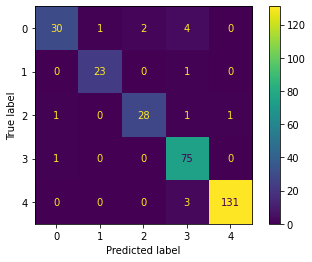

In [102]:
#pass the name of the model and automate the trainig process
rf_model_output = model_train(model_name="Random_Forest")

### Train a DecisionTree Model 

----------DECISION TREE-----------


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


0.9368467790579027
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.88      0.88      0.88        24
           2       0.90      0.90      0.90        31
           3       0.90      0.96      0.93        76
           4       0.99      0.98      0.98       134

    accuracy                           0.94       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.94      0.94      0.94       302

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       153
           1       0.89      0.86      0.88        65
           2       0.97      0.88      0.92       104
           3       0.93      0.98      0.96       409
           4       0.99      0.99      0.99       472
           5       1.00      0.50      0.67         2

    accuracy                           0.95      1205
   macro avg       0.95      0.84      0.88      1205
weig

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


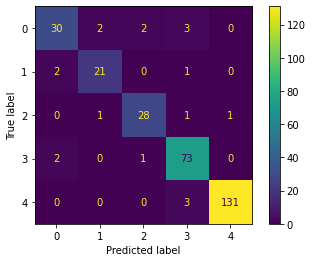

In [101]:
#pass the name of the model and automate the trainig process
dt_model_output = model_train(model_name="Decision_Tree")

### Train a XGBOOST 

-----------------XGBOOST---------------------


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


0.9565182602692979
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.92      0.92      0.92        24
           2       0.93      0.90      0.92        31
           3       0.95      0.99      0.97        76
           4       0.99      0.99      0.99       134

    accuracy                           0.96       302
   macro avg       0.94      0.93      0.93       302
weighted avg       0.96      0.96      0.96       302

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       153
           1       1.00      0.89      0.94        65
           2       0.98      0.90      0.94       104
           3       0.96      0.99      0.97       409
           4       0.99      0.99      0.99       472
           5       0.00      0.00      0.00         2

    accuracy                           0.97      1205
   macro avg       0.81      0.79      0.80      1205
weig

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

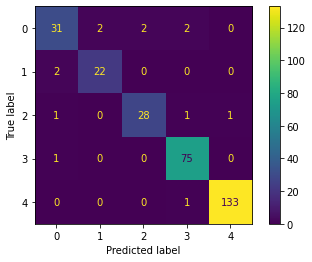

In [105]:
#pass the name of the model and automate the trainig process
xgb_model_output = model_train(model_name="XGBOOST") 

In [ ]:
xgb_model_output

{'f1_score': 0.9346535888952523,
 'model': RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=5),
                    param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                         'criterion': ['gini', 'entropy'],
                                         'gamma': [0.5, 1, 1.5, 2, 5],
                                         'max_depth': [4, 5, 6, 7, 8],
                                         'max_features': ['sqrt', 'log2'],
                                         'min_child_weight': [1, 5, 10],
                                         'subsample': [0.6, 0.8, 1.0]}),
 'params': {'colsample_bytree': 0.8,
  'criterion': 'gini',
  'gamma': 1,
  'max_depth': 8,
  'max_features': 'log2',
  'min_child_weight': 1,
  'subsample': 1.0},
 'test_score': 0.9354304635761589,
 'train_score': 0.9245758270834944}

### Compare models for best performance and run validation data on the best performing model

In [ ]:
def compare_and_finalize_models(rf,dt,xgb,valx_data,valy_data):

  ''' Compares the best performing model and loads that particular model and performs validation on validation dataset.

  Input : model outputs from RF, DT ,XGB ,X_validation,Y_validation

  Output : Model metrics for Validation data '''

  model_name = "finalized__model.pkl"
  rfm = rf['test_score']
  dtm = dt['test_score']
  xgbm = xgb["test_score"]

  if rfm > dtm  and dtm > xgbm  :
    print("Finalized Model is : RandomForestModel")
    loaded_model = pickle.load(open("/content/finalized_model_RF.sav", 'rb'))
  elif dtm > rfm and dtm > xgbm :
    print("Finalized Model is : Decision Tree Model ")
    loaded_model = pickle.load(open("/content/finalized_model_DT.sav", 'rb'))
  else:
    print("Finalized Model is : XGB Model")
    loaded_model = pickle.load(open("/content/finalized_model_XGB.sav", 'rb'))
    

  val_score_test = loaded_model.score(valx_data, valy_data)
  print(f"The  val_score_test is {val_score_test} ")

  val_recall_test = recall_score(valy_data, loaded_model.predict(valx_data),average="weighted")
  print(f"The val_recall_test is {val_recall_test} ")

  val_precision_test = precision_score(valy_data, loaded_model.predict(valx_data),average="weighted")
  print(f"The val_precision_test is {val_precision_test} ")

  val_f1_score_test = f1_score(loaded_model.predict(valx_data),valy_data,average="weighted")
  print(f"The val_f1_score_test is {val_f1_score_test}")

  output={ "val_score_test": val_score_test,
      "val_recall_test" : val_recall_test,
      "val_precision_test" : val_precision_test,
      "val_f1_score_test" : val_f1_score_test}

  return output
        

output = compare_and_finalize_models(rf_model_output,dt_model_output,xgb_model_output,data_handler["X_for_valid_df"],data_handler["valid_df_labels"])
 



Finalized Model is : XGB Model
The  val_score_test is 0.9 
The val_recall_test is 0.9 
The val_precision_test is 1.0 
The val_f1_score_test is 0.8526315789473685


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Build Confusion Matrix

In [ ]:
import pandas as pd 
dataframe = pd.read_csv('/content/Predicted_results (1).csv')

In [ ]:
vectorizer_model = pickle.load(open("/content/vectorizer.pk", 'rb'))
X = vectorizer_model.transform(dataframe["message"])
X= X.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
transform_model = pickle.load(open("/content/encoder.pk", 'rb'))
dataframe["domain"] = dataframe["domain"].map(lambda x: x.lower())


In [ ]:
dataframe["domain"]

0          other
1          other
2          other
3          other
4          other
          ...   
2966    phishing
2967    phishing
2968    phishing
2969    phishing
2970    phishing
Name: domain, Length: 2971, dtype: object

In [ ]:
Y = transform_model.transform(dataframe["domain"])

In [ ]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Finalized Model is : XGB Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


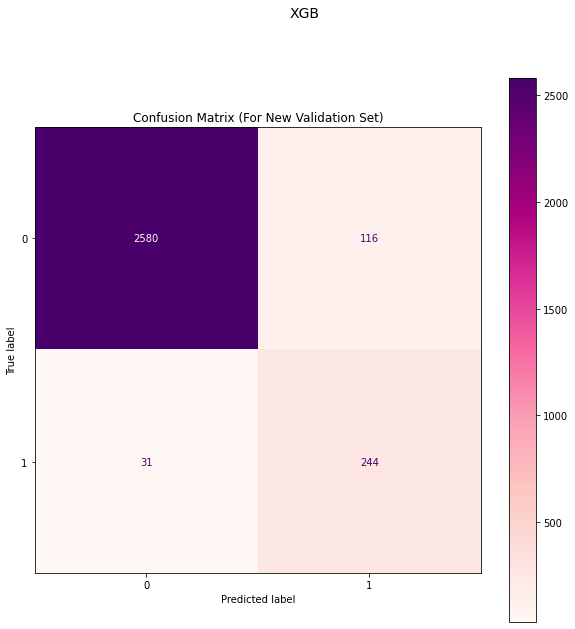

In [ ]:
def build_confusion_matrix (valx_data,valy_data):

  ''' Gives confusion matrix of trainset and validation set.

  Input : model outputs from RF, DT ,XGB ,X_validation,Y_validation

  Output : Model metrics for Validation data '''

  model_name = "finalized__model.pkl"
  # rfm = rf['test_score']
  # dtm = dt['test_score']
  # xgbm = xgb["test_score"]

  # if rfm > dtm  and dtm > xgbm  :
  # print("Finalized Model is : RandomForestModel")
  # loaded_model = pickle.load(open("/content/finalized_model_RF.sav", 'rb'))
  # elif dtm > rfm and dtm > xgbm :
  # print("Finalized Model is : Decision Tree Model ")
  # loaded_model = pickle.load(open("/content/finalized_model_DT.sav", 'rb'))
  # else:
  print("Finalized Model is : XGB Model")
  loaded_model = pickle.load(open("/content/finalized_model_XGB.sav", 'rb'))


# calculate confusion matrix for train and val subsets
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
  # titles for plots (1 common and 2 for subplots)
  plt.suptitle("XGB", fontsize=14)
  axes.title.set_text('Confusion Matrix (For New Validation Set)')
  plot_confusion_matrix(loaded_model, valx_data, valy_data, cmap=plt.cm.RdPu, ax=axes)
  # axes[1].title.set_text('Confusion Matrix (For Train Set)')
  # plot_confusion_matrix(loaded_model, X_train ,Y_train,cmap=plt.cm.RdPu, ax=axes[1])
  
    
        

output = build_confusion_matrix (X,Y)

### Visualize individual results for analysis and store in a file

In [ ]:
individual_results= pd.DataFrame(columns = ['Model', 'Data', 'Actual_result', 'Predicted_Result'])

In [ ]:
def visualize_results(validation_df,individual_results):
  for i in range(len(validation_df)):

    model = pickle.load(open("/content/finalized_model_XGB.sav", 'rb'))
    vector_model = pickle.load(open("/content/vectorizer.pk", 'rb'))
    df = validation_df['message'][i]
    print(df)
    preprocessed_output = preprocessing(df)
    print(preprocessed_output)
    vectorized_output = feature_extract(vector_model,preprocessed_output)
    print(vectorized_output)
    val_score_test = model.predict_proba(preprocessed_output[vectorized_output])
    print(val_score_test)
    
    model_result = {'Model':"XGB",
                    'Data':validation_df.preview[i],
                    'Actual_result':validation_df.Domain[i],
                      'Predicted_Result':val_score_test}
    individual_results = individual_results.append(model_result,ignore_index=True)
  
  individual_results.to_csv("Individual_Training_Results.csv")
  return(individual_results)
    
    

In [ ]:
df = validation_df[1]

KeyError: ignored

In [ ]:
def preprocessing(df):

    """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps.

    Input : Raw unpreprocessed text 

    Output : Processed text removed html url stopwords blankspaces

    """

    import string, re

    # remove html 

    text = re.sub(r"http\S+", "", df)
    text = re.sub(r"Http\S+", "", text)

    #  lemmatization for the messages 

    text = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(text) for text in text if not text in stopwords.words('english')]
    #msgs = [stemmer.stem(msg) for msg in msgs if not msg in stopwords.words('english')]
    text = " ".join(text)

    # lowercasing of strings 
    text = text.lower()

    # removing the articles in the text
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    text = re.sub(regex, " ", text)

    
    # removing the punctuation 
    exclude = set(string.punctuation)
    text = "".join(ch for ch in text if ch not in exclude)

    # removing the white spaces 
    text = " ".join(text.split())

    return text


def feature_extract(vector_model,cleaned_text):

    """ Extract features from the data using TF-IDF vectorizer .

    Input : Cleaned Text for features extraction 

    Output : Vectorized text with dimension 500 

    """

    vectorized_output = vector_model.transform([cleaned_text])
    vectorized_output = vectorized_output.toarray()
    return vectorized_output

    
def predict_text(model,cleaned_text,features):

    """ Predicts model score for a single input data .

    Input : Cleaned Text & Features used for Prediction

    Output : Cleaned Text, Label_definition either Phishing or Not Phishing and score of the predicted output
    
    """

    cleaned_text = cleaned_text
        
    features = features
    
    output = dict()
    score = model.predict_proba(features)
    if score[0][0]>score[0][1]:
        score = str(score[0][0])
    else :
        score = str(score[0][1])

    label = model.predict(features)
    if label[0] == 0 :
        label_def = "Not Phishing"
    elif label[0] == 1 :
        label_def = "Phishing" 
    text = cleaned_text 

    output = { "text" : text , "label_definition" : label_def ,"score" : score }
    

    return output 

In [ ]:
validation_df = pd.read_excel("/content/04-26 this weeks feed report search results.xlsx")

In [ ]:
validation_df.rename(columns = {'Phishing':'domain', 'preview':'message'}, inplace = True)
  

In [ ]:
validation_df.reset_index(drop=True)

,domain,URL,message
0,Phishing,lanza.me/fA2,Fifth Third Online #509: Your Account has been...
1,Phishing,https://rebrand.ly/trdln,Fifth Third: : your Account is blocked because...
2,Phishing,query.scanbegin.com/h4rjat,Your acc with fifth third has been disabled af...
3,Phishing,https://rgio.cc/secured53,53 Bank Alert: We lock access when we detect u...
4,Phishing,http://5-3rd-online.preview-domain.com/53d,FRM:FIFTH THIRD \nMSG:We have placed a tempora...
...,...,...,...
13571,OTHER,https://app.eventconnect.io/events/17929/hotel...,Zoom into June: https://app.eventconnect.io/ev...
13572,OTHER,https://zoom.us/j/8533197160,Zoom strike update\n\nKaty Rose is inviting yo...
13573,OTHER,stevespestcontrol.com,ztext:\nby stevespestcontrol.com\nBREAKING: Ea...
13574,OTHER,https://macropoint.co/2kG5sA,Zuum Transportation Inc requires real time loc...


In [ ]:
validation_df[0]

KeyError: ignored

In [ ]:
visualize_results(validation_df,individual_results)

Fifth Third Online #509: Your Account has been locked for security reasons. Click the link lanza.me/fA2 to complete the Identity verification Process. 
fifth third online 509 your account locked security reason click link lanzamefa2 complete identity verification process


ValueError: ignored

In [ ]:
validation_df=[["preview"]]

In [ ]:
type(validation_df)

list

In [ ]:
np.unique(validation_df.domain)

array(['OTHER', 'Phishing'], dtype=object)